In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

import konlpy
from nltk import download
import nltk

from PIL import Image
from wordcloud import WordCloud
from collections import Counter

In [17]:
df = pd.read_csv('./원본데이터/2022_12.csv', encoding='cp949')
df

,내용
0,문화/스포츠
1,이번 시상식 시즌에 봐야 할 국제 영화 12편
2,12 International Movies to Watch This Awards S...
3,미국
4,TIME
...,...
5173,"멀리서 온 아이디어, 가까이에 있는 가치"
5174,"?tletek t?volr?l, ?rt?kek k?zelr?l"
5175,마자르 넴제트
5176,"내 친구 중 한 명은 거의 세상 끝자락인 드라바 강에 있는 사포카로 이사를 갔고, ..."


In [18]:
kor_stopwords = ['한국','문화','우리','가장','사람','시작','위해','대한','이번','다른','자신','시간','모든','대해','통해','대한민국','예정','지난','동안','매우','올해','다음','때문',
                '하나','또한','이후','지금','현재','강전','그녀','여성']
kor_total = []

Okt = konlpy.tag.Okt()

In [19]:
for news in df['내용']:
    news = news.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','')
    pos_news = ['/'.join(t[:-1]) for t in Okt.pos(news) if ((t[1] == 'Noun') & (t[0] not in kor_stopwords))]
    kor_total.append(' '.join(pos_news))

In [20]:
# tf-idf 벡터 만들기
from sklearn.feature_extraction.text import CountVectorizer

kor_vectorizer = CountVectorizer() # 등장하는 단어들에 대한 오브젝트
kor_bow = kor_vectorizer.fit_transform(kor_total) # 딕셔너리에 실제 단어들을 입력

In [21]:
kor_vectorizer.vocabulary_.items()

dict_items([('스포츠', 4438), ('시상식', 4517), ('시즌', 4543), ('국제', 788), ('영화', 5334), ('미국', 2649), ('본문', 3230), ('사진', 3633), ('스틸컷', 4420), ('콜라주', 7772), ('영국', 5310), ('애프터', 4949), ('덴마크', 1675), ('거미', 264), ('인도', 6100), ('파키스탄', 8184), ('이랜드', 5955), ('이란', 5954), ('베어스', 3094), ('스웨덴', 4342), ('슬픔', 4462), ('삼각형', 3698), ('결심', 369), ('아르헨티나', 4739), ('독일', 1741), ('서부', 3852), ('전선', 6550), ('이상', 5986), ('멕시코', 2413), ('바르도', 2762), ('약간', 4983), ('진실', 7129), ('거짓', 277), ('연대기', 5234), ('베네수엘라', 3077), ('박스', 2813), ('프랑스', 8436), ('생토', 3820), ('메르', 2392), ('페터먼', 8284), ('틱톡', 8140), ('위스퍼', 5717), ('뉴욕타임스', 1400), ('뉴트', 1407), ('리치', 2179), ('화요일', 8951), ('조지아주', 6837), ('상원의원', 3753), ('경선', 398), ('라파엘', 1948), ('워녹', 5652), ('이름', 5961), ('폭스', 8386), ('뉴스', 1396), ('해니', 8715), ('허쉘', 8786), ('워커', 5659), ('패배', 8225), ('임박', 6249), ('지탄', 7098), ('일어나고', 6217), ('가지', 78), ('주요', 6923), ('원인', 5676), ('바로', 2760), ('중국', 6968), ('소유', 4112), ('소셜', 4091), ('미디어', 

In [22]:
# 생성한 TF-bow를 가지고 tf-idf 생성하기

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(kor_bow.toarray())

In [23]:
tfidf_weights = [(word, tfidf.getcol(idx).sum()) for word, idx in kor_vectorizer.vocabulary_.items()]
tfidf_weights[0:10]

[('스포츠', 9.296821557320095),
 ('시상식', 6.592489836762875),
 ('시즌', 19.233692001103663),
 ('국제', 16.292090017069278),
 ('영화', 41.710814696728775),
 ('미국', 12.859409396232566),
 ('본문', 3.4418189474586347),
 ('사진', 21.24386363613265),
 ('스틸컷', 0.550994745651584),
 ('콜라주', 0.550994745651584)]

In [24]:
final = pd.DataFrame(tfidf_weights, columns = ['word', 'tfidf'])
final = final.sort_values('tfidf', ascending=False)
final = final.reset_index(drop=True)
final

,word,tfidf
0,브라질,73.860430
1,월드컵,66.774929
2,드라마,62.593791
3,경기,59.142099
4,방탄소년단,51.613510
...,...,...
9136,아렘레를레,0.042389
9137,우샤크,0.042389
9138,안타키아,0.042389
9139,비단길,0.042389


In [25]:
final = final.head(100)
final_dict = final.set_index('word').to_dict()['tfidf']
final_dict

{'브라질': 73.86043002014216,
 '월드컵': 66.77492852403466,
 '드라마': 62.59379082680122,
 '경기': 59.1420993575473,
 '방탄소년단': 51.61351045497134,
 '세계': 46.49950400828805,
 '핑크': 43.18401718022065,
 '선수': 43.05389539814342,
 '감독': 42.34490090099379,
 '영화': 41.710814696728775,
 '블랙': 39.1568982553605,
 '포르투갈': 38.631600302073956,
 '그룹': 37.084900370812846,
 '진출': 35.9923702178866,
 '태국': 35.42616566357732,
 '최고': 31.82222670080081,
 '케이팝': 28.337996709208074,
 '행사': 27.603946836529104,
 '축구': 27.46043437601505,
 '일본': 25.748183518226128,
 '멤버': 25.560509941383884,
 '한식': 24.73234002766435,
 '문화원': 24.368208190757493,
 '아시아': 23.938980557363855,
 '관광': 23.471883052195913,
 '인기': 23.197392616022732,
 '공연': 22.61145915683664,
 '개최': 21.996389233595508,
 '노래': 21.89712867129493,
 '음악': 21.714569698090603,
 '카타르': 21.364870374860164,
 '사진': 21.24386363613265,
 '사랑': 21.070604115670847,
 '넷플릭스': 20.435327783339055,
 '스타': 19.816808336209302,
 '입대': 19.760244917779215,
 '우루과이': 19.660407238768613,
 '시즌':

In [33]:
im = Image.open('mask.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'

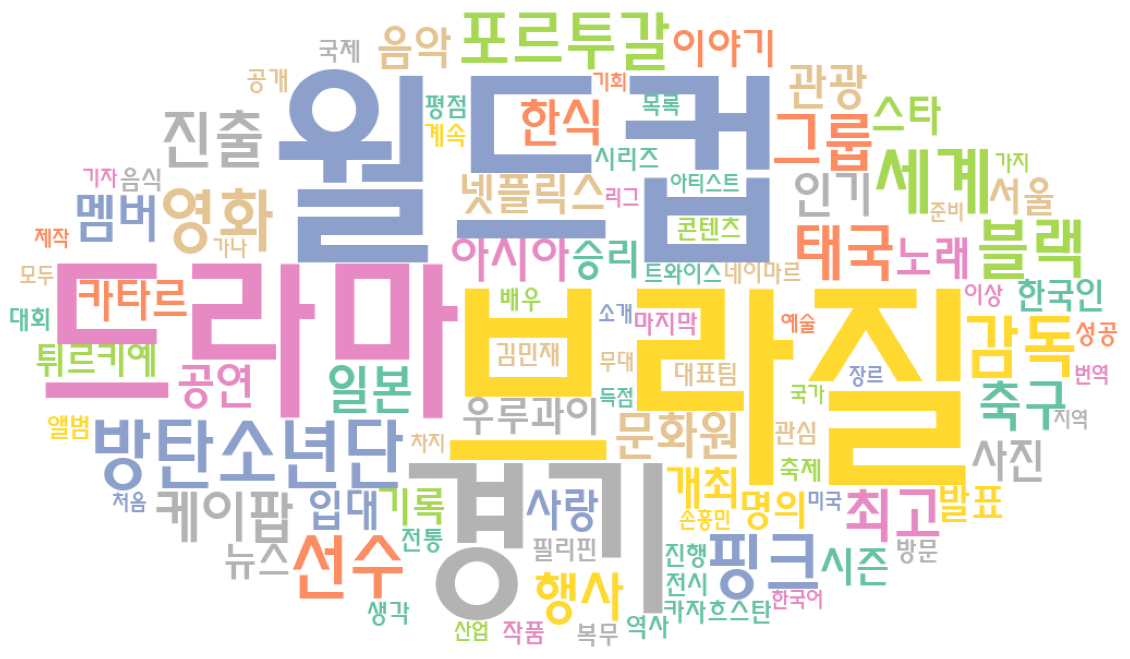

In [35]:
#prefer_horizontal=Ture -> 글씨 똑바르게 나오게 하기
wc = WordCloud(font_path=font_path, width=1500, height=1200, background_color='white', colormap='Set2', mask=mask_arr, prefer_horizontal=True).fit_words(final_dict)

plt.figure(figsize = (20, 20))  
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
# End of File